<a href="https://colab.research.google.com/github/JordanHT-OIT/electrodynamics/blob/master/week-06/09-electromagnetic-waves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Electromagnetic Waves

This week, we will look at the prototype for time-dependent electromagnetic fields: the electromagnet plane wave.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Maxwell's Equations

In the absence of any sources — charges or currents — Maxwell's equations give ***wave equations*** for the electric and magnetic fields:

\begin{align*}
\nabla^2 \vec{E} - \dfrac{\epsilon\mu}{c^2} \dfrac{\partial^2 \vec{E}}{\partial t^2} &= 0 \\
\nabla^2 \vec{B} - \dfrac{\epsilon\mu}{c^2} \dfrac{\partial^2 \vec{B}}{\partial t^2} &= 0
\end{align*}

These descirbe waves that propagate with a speed of $v = c / \sqrt{\mu\epsilon}$.

Any function $f(\vec{r} \pm \vec{v} t)$ is a solution of the wave equation.

Maxwell's equation impose additional constraints.  In particular,

\begin{align*}
\nabla \times \vec{E} &= \dfrac{1}{c} \dfrac{\partial \vec{B}}{\partial t} \\
\nabla \times \vec{B} &= -\dfrac{\mu\epsilon}{c} \dfrac{\partial \vec{E}}{\partial t}
\end{align*}

## Plane Waves

One solution to the wave equation is a ***plane wave***:

$$
f(\vec{r},t) = A \, e^{i(\vec{k} \cdot \vec{r} - \omega t)}
$$

The wave equation requires that $\omega = vk$.  If each component of $\vec{E}$ and $\vec{B}$ has this form, we call it an electromagnetic plane wave.  Maxwell's equations give the following relations:

\begin{align*}
\vec{k} \cdot \vec{E} &= 0 \\
\vec{k} \times \vec{E} &= \dfrac{\omega}{c} \vec{B} \\
\vec{k} \cdot \vec{B} &=0 \\
\vec{k} \times \vec{B} &= - \dfrac{\mu \epsilon \omega}{c} \vec{E}
\end{align*}

Let's look at this class of solution.

In [2]:
# Define the material.
mu = 1
epsilon = 1
n = np.sqrt(mu*epsilon)

# Define the wave vector.
# Give magnitude, lattitude, and longitdue.
k = 1.00 * np.pi
theta = 0.00 * np.pi
phi = 0.00 * np.pi

kx = k * np.sin(theta) * np.cos(phi)
ky = k * np.sin(theta) * np.sin(phi)
kz = k * np.cos(theta)

omega = k/n

# Set time.
t0 = 0

# Define the electric field, magnetic field, and Poynting vector
# for an electromagnetic plane wave.

# Give initial direction of electric field.
# Everything else is determined by this.
E0 = 0.25
B0 = np.sqrt(epsilon*mu) * E0

thetaE = 1.25 * np.pi
phiE = 0.0 * np.pi

Ex0 = E0 * np.sin(thetaE) * np.cos(phiE)
Ey0 = E0 * np.sin(thetaE) * np.sin(phiE)
Ez0 = E0 * np.cos(thetaE)

# Set phase difference between electric and magnetic fields.
alpha = 0.0 * np.pi

# Create a grid.
box_size = 2
num_points = 11

s = np.linspace(-box_size, box_size, num_points)
X, Y, Z = np.meshgrid(s,s,s)

# Compute the fields on a grid.
Ex = Ex0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t0))
Ey = Ey0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t0)) * np.exp(1j*alpha)
Ez = Ez0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t0))

Bx = (ky*Ez - kz*Ey)/omega
By = (kz*Ex - kx*Ez)/omega
Bz = (kx*Ey - ky*Ex)/omega

Sx = 1/(8*np.pi*mu) * (Ey * Bz.conj() - Ez * By.conj())
Sy = 1/(8*np.pi*mu) * (Ez * Bx.conj() - Ex * Bz.conj())
Sz = 1/(8*np.pi*mu) * (Ex * By.conj() - Ey * Bx.conj())

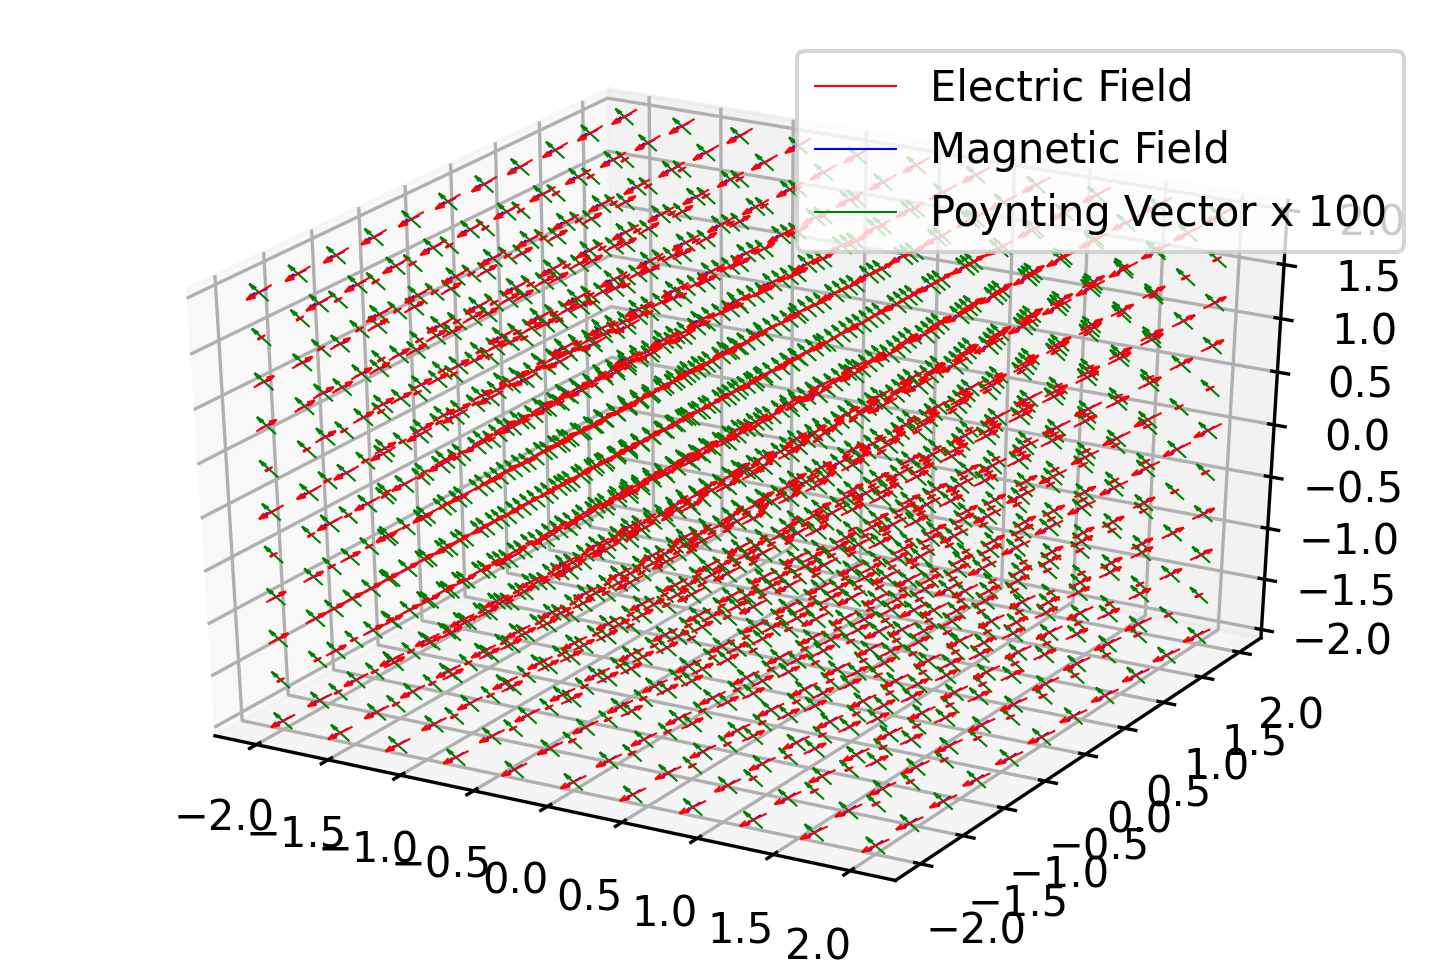

In [3]:
# Plot the field.
fig = plt.figure(dpi=300)
ax = fig.add_subplot(projection='3d')

ax.quiver3D(X,Y,Z, Ex.real, Ey.real, Ez.real, pivot='middle',
            linewidth=0.5, color='red', label='Electric Field')
ax.quiver3D(X,Y,Z, Bx.real, By.real, Bz.real, pivot='middle',
            linewidth=0.5, color='blue', label='Magnetic Field')
ax.quiver3D(X,Y,Z, 100*Sx.real, 100*Sy.real, 100*Sz.real, pivot='middle',
            linewidth=0.5, color='green', label='Poynting Vector x 100')
ax.legend()

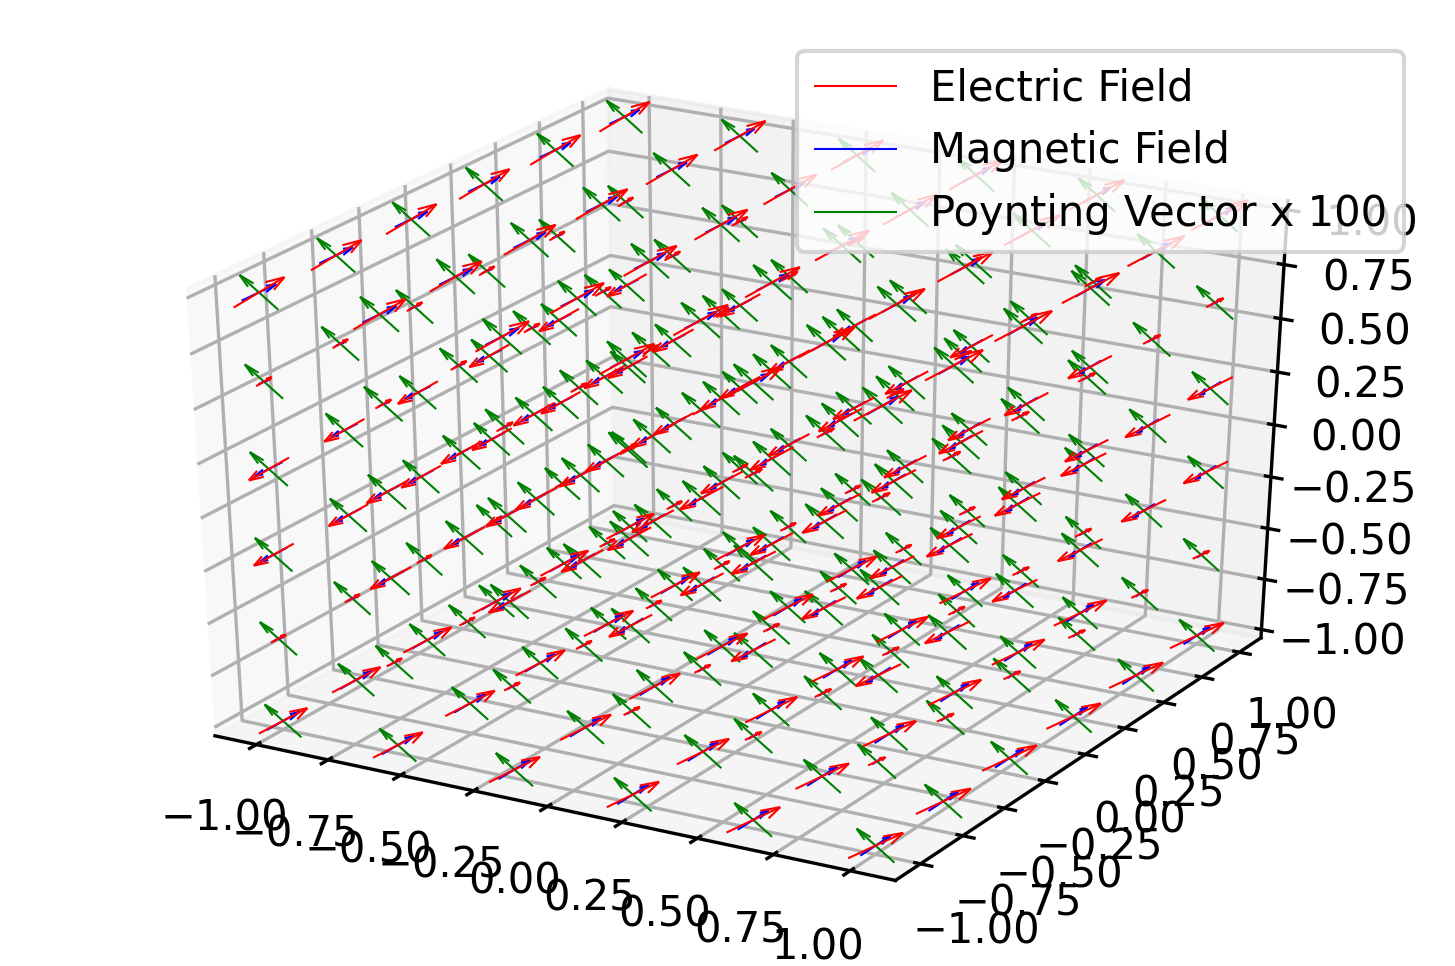

In [4]:
# Plot the field.
# Crop to see more detail.

# Create a grid.
box_size = 1
num_points = 6

s = np.linspace(-box_size, box_size, num_points)
X, Y, Z = np.meshgrid(s,s,s)

# Compute the fields on a grid.
ex = Ex0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t0))
ey = Ey0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t0)) * np.exp(1j*alpha)
ez = Ez0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t0))

bx = (ky*ez - kz*ey)/omega
by = (kz*ex - kx*ez)/omega
bz = (kx*ey - ky*ex)/omega

sx = 1/(8*np.pi*mu) * (ey * bz.conj() - ez * by.conj())
sy = 1/(8*np.pi*mu) * (ez * bx.conj() - ex * bz.conj())
sz = 1/(8*np.pi*mu) * (ex * by.conj() - ey * bx.conj())

# Make the plot.
fig = plt.figure(dpi=300)
ax = fig.add_subplot(projection='3d')

ax.quiver3D(X,Y,Z, ex.real, ey.real, ez.real, pivot='middle',
            linewidth=0.5, color='red', label='Electric Field')
ax.quiver3D(X,Y,Z, bx.real, by.real, bz.real, pivot='middle',
            linewidth=0.5, color='blue', label='Magnetic Field')
ax.quiver3D(X,Y,Z, 100*sx.real, 100*sy.real, 100*sz.real, pivot='middle',
            linewidth=0.5, color='green', label='Poynting Vector x 100')
ax.legend()

## Spatial Structure

Do your best to describe the spatial structure of the fields.

- In what direction does the electric field point?
- In what direction does the magnetic field point?
- In what direction does the Poynting vector point?
- How does this change as you move along the x, y, and z axes?

The field, with the exeptions of edge distortions, is uniform throughout the whole volume at this time. <br>
-  The electric field 'points' in the -X direction, assuming that the plot has the standard isometric 3D axis layout.
-  The magnetic field 'points' in the -Y direction, using the same assumptions.
-  The Poynting vectors point in the +Z direction.

The magnitude of the wave vector in the last plot was $k = \pi$.  Change this value to $k = 2\pi$.  Describe how the spatial structure of the fields changes.

Note: The initial value was *not* pi, but 1.57 pi. <br>
Again, neglecting the edge distortions, the fields are still uniform, but now the electric field 'points' in the +X direction, and the magnetic field 'points' in the +Y direction (a rotation of some sort?). The Poynting vectors are unchanged.

Change this value to $k = \pi/2$.  Describe how the spatial structure of the fields changes.

The electric field now 'points' in the +Y direction, and the magnetic field 'points' in the +X direction. The Poynting vectors are unchanged, again. <br>
This is not a planar rotation, but the two fields switching directions, with the electric field on hte X-axis, and the magnetic field on the Y-axis.

The direction of $\vec{k}$ is defined by the polar angle $\theta$ and the azimuthal angle $\phi$.  Set $k = \pi$.  Change the ***direction*** of $\vec{k}$ — but not the magnitude — and describe your observations of the spatial structure of the fields.

- How does the direction of $\vec{k}$ affect the direction of $\vec{E}$?
- How does the direction of $\vec{k}$ affect the direction of $\vec{B}$?
- How does the direction of $\vec{k}$ affect the direction of $\vec{S}$?

While I'm not entirely sure this isn't a bug, $\theta$ directly effected the directions of all three vectors, with spacial cases like $\theta$ = $\pi$/2, $\phi$ = 0 eliminating $\vec{E}$ (and therefore also $\vec{S}$). However, the effects of $\phi$ were only noticable at these values of $\theta$, where non integer multiples of $\pi$ for $\phi$ resulted in the swapping of the $\vec{B}$ and $\vec{S}$ axes - that is to say that $\vec{S}$ was on the Y-axis, and $\vec{B}$ on the Z-axis. <br>
This behavior is very strange to me, but I suppose the magnetic field is based off the electric field, so it's not super surprising.

The direction of the electric field and the relative phase of its components defines the ***polarization*** of the wave.

Set $\vec{k}$ to point along the $z$-axis: $\theta = 0$ and $\phi=0$.

Vary the direction of the electric field by adjusting `thetaE` and `phiE` above.

- What happens to $\vec{E}$, $\vec{B}$, and $\vec{S}$ as you change `phiE` while holding `thetaE = 0.5 * np.pi`?
- What happens to $\vec{E}$, $\vec{B}$, and $\vec{S}$ as you change `thetaE` while holding `phiE = 0.0`?
- What directions of the electric field give the smallest Poynting vectors?

When $\phi$E is varied at $\theta$E = $\pi$/2, the electric and magnetic fields 'rotate' in the X-Y plane. Naturally, this does not effect the Poynting vectors. <br>
When $\theta$E is varied at $\phi$E = 0, the electric field and Poynting vectors 'rotate' in the X-Z plane, with the magnetic field dropping out at integer multiples of $\pi$ - bringing the Poynting vectors with them.

## Temporal Structure

Electromagnetic waves oscillate in space and time.

The code below will create two plots of the same electromagnetic plane wave at different times.

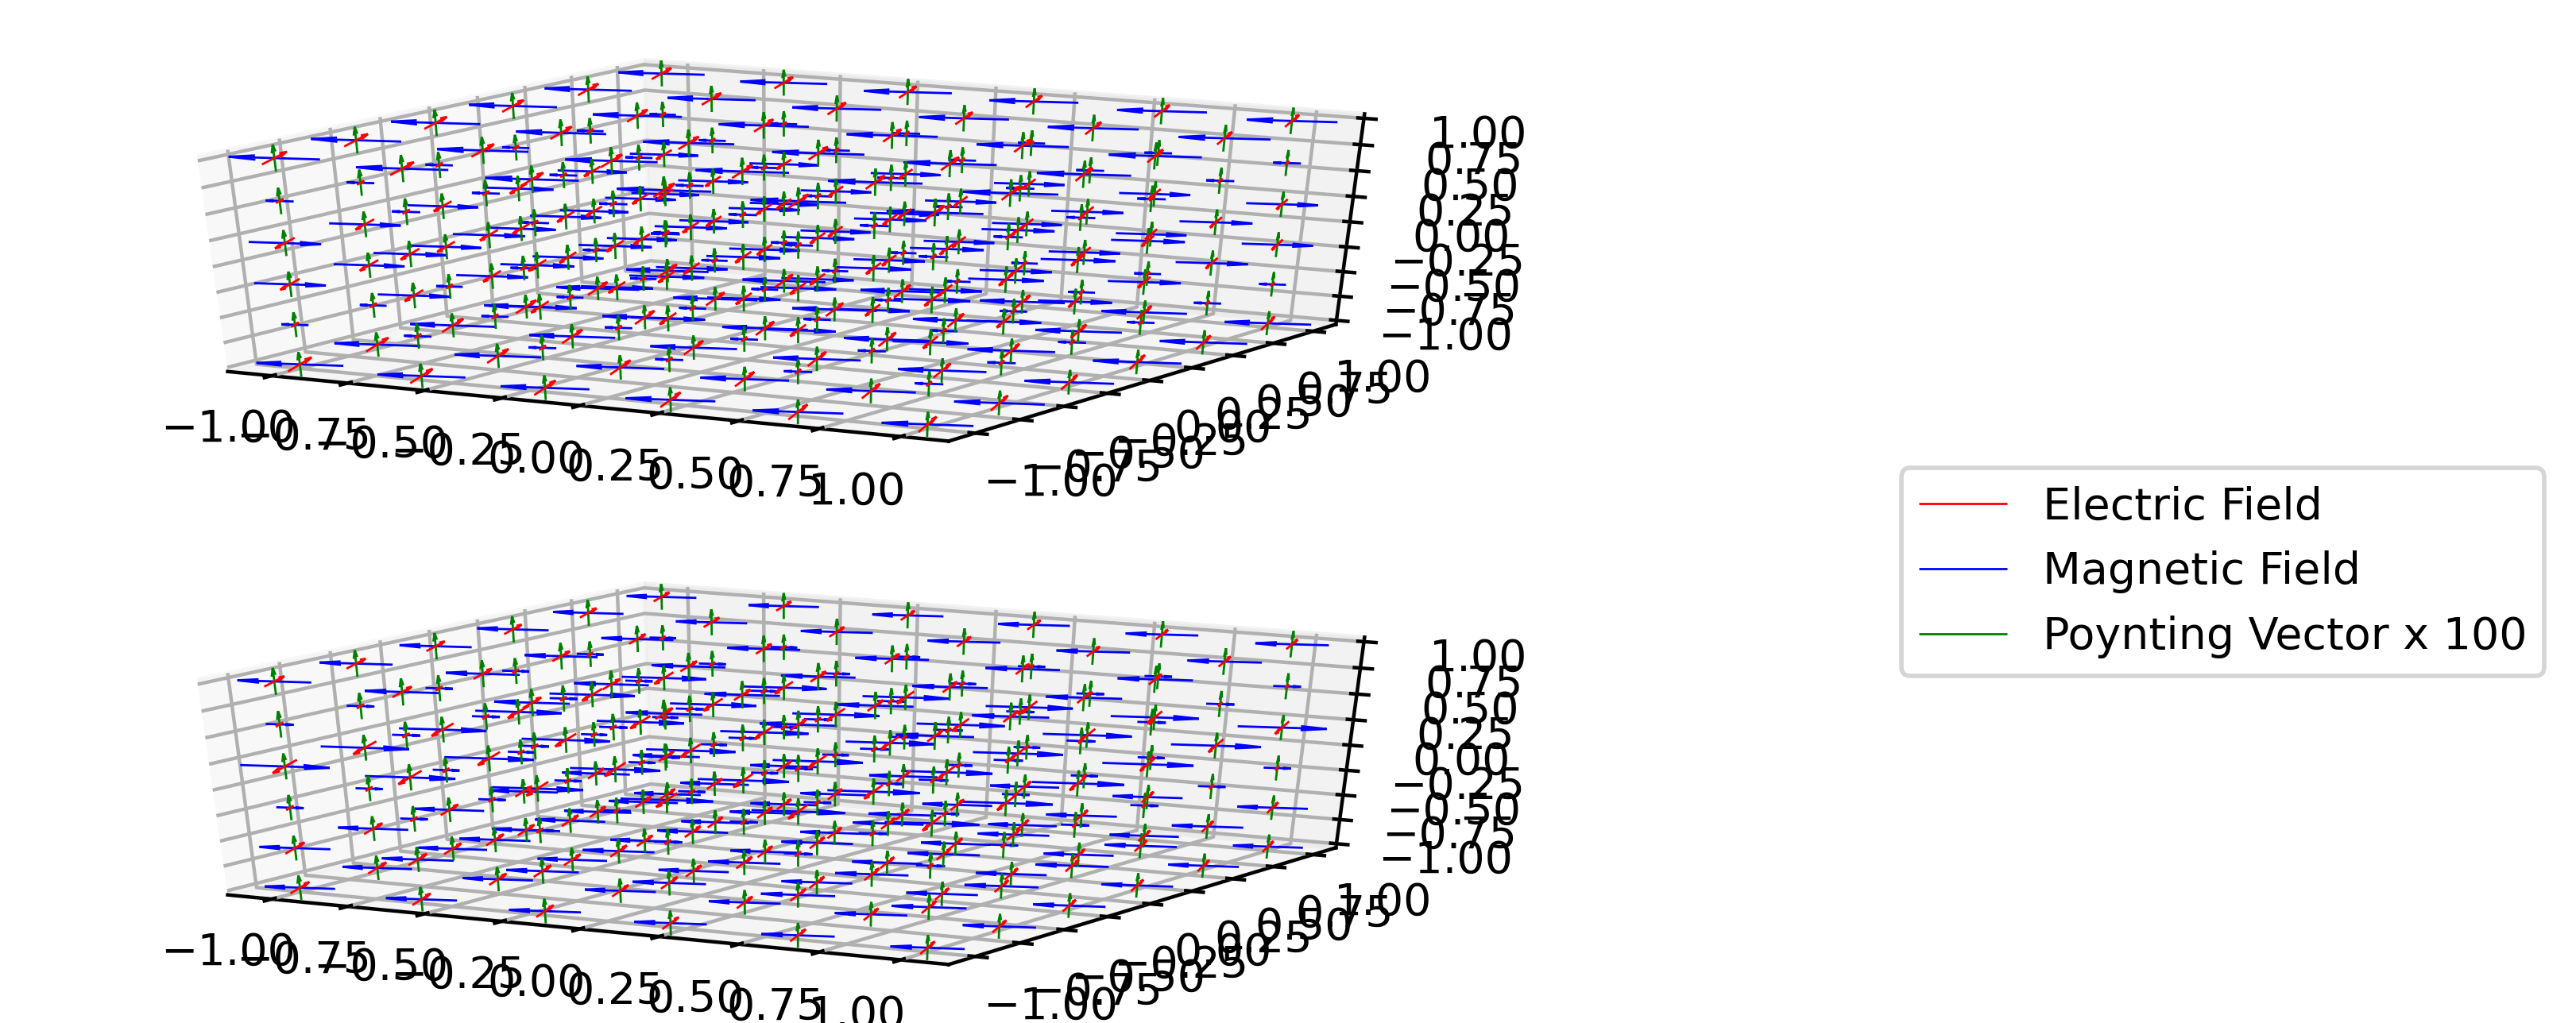

In [5]:
# Define the material.
mu = 1
epsilon = 1
n = np.sqrt(mu*epsilon)

# Define the wave vector.
# Give magnitude, lattitude, and longitdue.
k = 1.00 * np.pi
theta = 0.0 * np.pi
phi = 0.0 * np.pi

kx = k * np.sin(theta) * np.cos(phi)
ky = k * np.sin(theta) * np.sin(phi)
kz = k * np.cos(theta)

omega = k/n

# Set times for snapshots.
T = (2*np.pi) / omega
t0 = 0.00
t1 = t0 + 1.1*T

# Define the electric field, magnetic field, and Poynting vector
# for an electromagnetic plane wave.

# Give initial direction of electric field.
# Everything else is determined by this.
E0 = 0.25
B0 = np.sqrt(epsilon*mu) * E0

thetaE = 0.50 * np.pi
phiE = 0.40 * np.pi

Ex0 = E0 * np.sin(thetaE) * np.cos(phiE)
Ey0 = E0 * np.sin(thetaE) * np.sin(phiE)
Ez0 = E0 * np.cos(thetaE)

# Set phase difference between electric and magnetic fields.
alpha = 1.00 * np.pi

# Plot the results.
# Create a grid.
box_size = 1
num_points = 6

s = np.linspace(-box_size, box_size, num_points)
X, Y, Z = np.meshgrid(s,s,s)

# Create the figure.
fig = plt.figure(dpi=400)
ax1 = fig.add_subplot(211, projection='3d')
ax2 = fig.add_subplot(212, projection='3d')

# Compute the fields on a grid at the first time.
ex = Ex0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t0))
ey = Ey0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t0)) * np.exp(1j*alpha)
ez = Ez0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t0))

bx = (ky*ez - kz*ey)/omega
by = (kz*ex - kx*ez)/omega
bz = (kx*ey - ky*ex)/omega

sx = 1/(8*np.pi*mu) * (ey * bz.conj() - ez * by.conj())
sy = 1/(8*np.pi*mu) * (ez * bx.conj() - ex * bz.conj())
sz = 1/(8*np.pi*mu) * (ex * by.conj() - ey * bx.conj())

ax1.quiver3D(X,Y,Z, ex.real, ey.real, ez.real, pivot='middle',
             linewidth=0.5, color='red', label='Electric Field')
ax1.quiver3D(X,Y,Z, bx.real, by.real, bz.real, pivot='middle',
             linewidth=0.5, color='blue', label='Magnetic Field')
ax1.quiver3D(X,Y,Z, 100*sx.real, 100*sy.real, 100*sz.real, pivot='middle',
             linewidth=0.5, color='green', label='Poynting Vector x 100')

# Compute the fields on a grid at the second time.
ex = Ex0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t1))
ey = Ey0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t1)) * np.exp(1j*alpha)
ez = Ez0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t1))

bx = (ky*ez - kz*ey)/omega
by = (kz*ex - kx*ez)/omega
bz = (kx*ey - ky*ex)/omega

sx = 1/(8*np.pi) * (ey * bz.conj() - ez * by.conj())
sy = 1/(8*np.pi) * (ez * bx.conj() - ex * bz.conj())
sz = 1/(8*np.pi) * (ex * by.conj() - ey * bx.conj())

ax2.quiver3D(X,Y,Z, ex.real, ey.real, ez.real, pivot='middle',
             linewidth=0.5, color='red', label='Electric Field')
ax2.quiver3D(X,Y,Z, bx.real, by.real, bz.real, pivot='middle',
             linewidth=0.5, color='blue', label='Magnetic Field')
ax2.quiver3D(X,Y,Z, 100*sx.real, 100*sy.real, 100*sz.real, pivot='middle',
             linewidth=0.5, color='green', label='Poynting Vector x 100')
ax2.legend(bbox_to_anchor=(1.25, 1.25), loc='upper left')

Adjust the value of `t1` while keeping `t0` and the other parameters constant.

- What differences do you notice between the two plots as you adjust `t1`?

The electric and magnetic fields oscillate in their own axes, fully swtiching every T/2 periods (T is a full cycle). <br>
The direction of the Poynting vectors remains the same.

Adjust the direction of $\vec{k}$, as in the exercises above.  Observe the wave at different times.

- What differences do you notice between the two plots as you adjust `t1` and $\vec{k}$?

It's still the same oscillatory behavior as before, but now everything is in a different direction.

In addition to changing the ***direction*** of $\vec{E}$, we can also change the ***relative phase*** of its components.  The code above allows us to describe waves of the form

\begin{align*}
Ex &= E_{x0} \, \cos \omega t \\
Ey &= E_{y0} \, \cos (\omega t + \alpha) \\
Ez &= E_{z0} \, \cos \omega t
\end{align*}

Reset $\vec{k}$ to point along the $z$-axis: $\theta = 0$ and $\phi = 0$.  Set $\alpha = \pi/2$.  Then, adjust the value of `t1` while keeping `t0` and the other parameters constant.

- What differences do you notice between the two plots as you adjust `t1`?
- How does $\alpha = \pi/2$ compare with $\alpha = 0$?

Now with $\alpha = \pi/2$, not only do the electric and magnetic fields oscillate in sign, but they also 'rotate' in the X-Y plane. As far as I can tell, the Poynting vectors remain the same (I expected it to flip at some point, but that does not seem to be the case). <br>
This motion seems similar to the behavior observed in the polarization experiment.

Explore other values of $\alpha$ and `t1`.

- How does $\alpha$ affect the patterns you observe?

Other than the different starting angle changing slightly, I was not able to observe a different behavior of movement. Was there somthing else changing that I didn't see?

# Electromagnetic Movies

Observing plane waves is instructive, but a movie can illustrate the behavior even better.

The following code will create a movie of a plane wave and display it in this notebook.  It may take a little while to run.

If you get an error regarding `ffmpeg` use `conda` to install it.  Open a terminal or the "Anaconda Prompt" and type
```
conda install --channel conda-forge ffmpeg
```

In [73]:
# Name of file to store movie.
num_frames = 500

## Define the electromagnetic wave and plot its initial configuration.
# Define the material.
mu = 1
epsilon = 1
n = np.sqrt(mu*epsilon)

# Define the wave vector.
# Give magnitude, lattitude, and longitdue.
k = 1.00 * np.pi
theta = 0.00 * np.pi
phi = 0.00 * np.pi

kx = k * np.sin(theta) * np.cos(phi)
ky = k * np.sin(theta) * np.sin(phi)
kz = k * np.cos(theta)

omega = k/n

# Set times for snapshots.
T = (2*np.pi) / omega
dt = T / 50
t0 = 0.00

# Define the electric field, magnetic field, and Poynting vector
# for an electromagnetic plane wave.

# Give initial direction of electric field.
# Everything else is determined by this.
E0 = 0.25
B0 = np.sqrt(epsilon*mu) * E0

thetaE = 0.33 * np.pi
phiE = 0.33 * np.pi

Ex0 = E0 * np.sin(thetaE) * np.cos(phiE)
Ey0 = E0 * np.sin(thetaE) * np.sin(phiE)
Ez0 = E0 * np.cos(thetaE)

# Set phase difference between electric and magnetic fields.
alpha = 0.50 * np.pi

In [74]:
# Create a grid.
L = 1
N = 5

# Define function to compute fields on a grid.
def compute_fields(n, box_size=L, num_points=N):
    t = t0 + n * dt
    
    s = np.linspace(-box_size, box_size, num_points)
    X, Y, Z = np.meshgrid(s,s,s)

    
    # Compute the fields on a grid at the initial time.
    ex = Ex0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t))
    ey = Ey0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t)) * np.exp(1j*alpha)
    ez = Ez0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t))
    
    bx = (ky*ez - kz*ey)/omega
    by = (kz*ex - kx*ez)/omega
    bz = (kx*ey - ky*ex)/omega
    
    sx = 1/(8*np.pi*mu) * (ey * bz.conj() - ez * by.conj())
    sy = 1/(8*np.pi*mu) * (ez * bx.conj() - ex * bz.conj())
    sz = 1/(8*np.pi*mu) * (ex * by.conj() - ey * bx.conj())
        
    return X, Y, Z, ex.real, ey.real, ez.real, bx.real, by.real, bz.real, sx.real, sy.real, sz.real


# Create a figure for each time step.
# It is essential that the frames be named in alphabetical order.
# {:03d} will display integers with three digits and insert zeros if needed:
# '000_movie.jpg', '001_movie.jpg', etc.
file_name = "{:03d}_movie.jpg"

# Generate frames and save each figure as a separate .jpg file.
for i in range(num_frames):
    # Update fields.
    X,Y,Z,ex,ey,ez,bx,by,bz,sx,sy,sz = compute_fields(i)

    ## Set up the plot.
    fig = plt.figure(dpi=400)
    ax = fig.add_subplot(projection='3d')
    ax.set(xlim3d=(-1.1, 1.1), xlabel='X')
    ax.set(ylim3d=(-1.1, 1.1), ylabel='Y')
    ax.set(zlim3d=(-1.1, 1.1), zlabel='Z')
    ax.view_init(40,25)

    e_quivers = ax.quiver(X,Y,Z, ex.real, ey.real, ez.real, pivot='middle',
                          linewidth=0.5, color='red', label='Electric Field')
    b_quivers = ax.quiver(X,Y,Z, bx.real, by.real, bz.real, pivot='middle',
                          linewidth=0.5, color='blue', label='Magnetic Field')
    s_quivers = ax.quiver(X,Y,Z, 100*sx.real, 100*sy.real, 100*sz.real, pivot='middle',
                          linewidth=0.5, color='green', label='Poynting Vector x 100')

    ax.legend(bbox_to_anchor=(0.7, 1.1), loc='upper left')
    
    plt.savefig(file_name.format(i))
    print("%s saved ..." % file_name.format(i))
    plt.close(fig)

000_movie.jpg saved ...
001_movie.jpg saved ...
002_movie.jpg saved ...
003_movie.jpg saved ...
004_movie.jpg saved ...
005_movie.jpg saved ...
006_movie.jpg saved ...
007_movie.jpg saved ...
008_movie.jpg saved ...
009_movie.jpg saved ...
010_movie.jpg saved ...
011_movie.jpg saved ...
012_movie.jpg saved ...
013_movie.jpg saved ...
014_movie.jpg saved ...
015_movie.jpg saved ...
016_movie.jpg saved ...
017_movie.jpg saved ...
018_movie.jpg saved ...
019_movie.jpg saved ...
020_movie.jpg saved ...
021_movie.jpg saved ...
022_movie.jpg saved ...
023_movie.jpg saved ...
024_movie.jpg saved ...
025_movie.jpg saved ...
026_movie.jpg saved ...
027_movie.jpg saved ...
028_movie.jpg saved ...
029_movie.jpg saved ...
030_movie.jpg saved ...
031_movie.jpg saved ...
032_movie.jpg saved ...
033_movie.jpg saved ...
034_movie.jpg saved ...
035_movie.jpg saved ...
036_movie.jpg saved ...
037_movie.jpg saved ...
038_movie.jpg saved ...
039_movie.jpg saved ...
040_movie.jpg saved ...
041_movie.jpg sa

In [75]:
!ffmpeg -y -i %03d_movie.jpg -pix_fmt yuv420p movie.mp4

ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-li

In [76]:
# Play the movie within the notebook.
from IPython.display import HTML

HTML("""
    <video width="800" height="800" alt="test" controls>
        <source src=%s type="video/mp4">
    </video>
""" % "movie.mp4")

Even though it takes a while to create a video, play around with the field parameters and try to get an intuition for the kinds of electromagnetic fields associated with different polarizations ($\vec{E}_0$ and $\alpha$) and wave vectors ($\vec{k}$).

For the sake of brevity, I will describe the parameters $\theta$, $\phi$, and $\alpha$ as ($\theta$, $\phi$, $\alpha$). <br>
In experiments using $\theta$ = $\phi$, $\alpha$ = $\mathbb{Z}π$, such as (0,0,0), (0,0,$π$), ($π$/2,$π$/2,0), and ($π$,$π$,0), the electric and magnetic field vectors oscillated in the same plane with the same apmlitude.<br>
In experiments using $\theta$ $\neq$ $\phi$, or $\alpha$ $\neq$ $\mathbb{Z}π/2$, such as (3$π$/2,$π$/2,$π$/2), (0,0,0.33$π$), ($π$/2,$π$,$π$/2), and ($π$,0,-$π$/2), the electric and magnetic field vectors both oscillated in amplitude and rotated in a plane. <br>
All experiments upto this point used the default $\vec{E}_0$ of (0.50$π$, 0.33$π$). However, additional experiments (about 15) were run with different values to try and find a set of parameters with only rotation, but ultimately failed, as all tested combinations resulted in either the elimination of the electric field component vector, where slightly elliptical, or did not rotate on a single plane. The closest I got was with an $\vec{E}_0$ of (0.33$π$, 0.33$π$), and (0,0,$π$/2) - which had a constant rotation and amplitude, but appeared to "wobble" in different planes.

- Give a set of parameters for an electromagnetic wave with **linear polarization**.
- Give a set of parameters for an electromagnetic wave with **circular polarization**.
- Give a set of parameters for an electromagnetic wave with **elliptical polarization**.

Threfore, the fist set of experiments from the previous answer have linear polarization, and the second set has elliptical polarization. <br>
See the last paragraph in the previous answer for my attempt at a circular polarization.


Why is it called an "electromagnetic plane wave"?

Since regardless of the type of polarization, the electric and magnetic fields are changing within a plane, they are, presumably, called plane waves.

# Reflection and Summary

- What are the major takeaways of this assignment for you?
- What was the most difficult part of this assignment?
- What was the most interesting part of this assignment?
- What questions do you have?

-  The most important takeaways, besides a better general 'feel' for wave dynamics, where that the relative phase and angle of the electric field are the dominant factors in the behavior (I.E.: polarization) of the wave.
-  The hardest part by far was testing the different parameters for the electric field in the *Electromagnetic Movies* section - mostly because it takes a *very* long time to generate 500 frames. I probably should have just reduced the number of frames...
-  While very difficult and confusing, investigating the parameters that affect polarization was quite interesting. Additionally, the edge distortions made it a bit more difficult to make observations.
-  As for questions, I have already put them in line in my responses prior.
<br><br>
Since it is topical, I would like to expand on what I said in lecture about "complex power being a normal and completely reasonable result" (you were skeptical about this claim), I have included a link explaining it (to a degree) here: https://www.cliffordpower.com/wp-content/uploads/2020/01/IS_40_Power_Factor.pdf <br>
For more infromation on this, look up "power triangle".